In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
Df = pd.read_csv('Df.csv', header =0, sep = ',')
Df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age,Gender,BMI Category
0,Id2335,1992,Jul,9,0,563.84,2,3,3,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K",32,1,0
1,Id2334,1992,Nov,30,0,570.62,2,1,3,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",32,1,0
2,Id2333,1993,Jun,30,0,600.00,2,1,3,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie",31,2,0
3,Id2332,1992,Sep,13,0,604.54,3,3,3,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",32,1,0
4,Id2331,1998,Jul,27,0,637.26,3,3,3,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,Id6,1962,Aug,4,0,52590.83,1,3,1,32.800,6.59,0,0,0,0,1,"Baker, Mr. Russell B.",62,1,1
1759,Id5,1989,Jun,19,0,55135.40,1,2,2,35.530,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",35,2,1
1760,Id3,1970,?,11,3,60021.40,1,1,2,34.485,11.87,1,0,0,2,1,"Lu, Mr. Phil",54,1,1
1761,Id2,1977,Jun,8,0,62592.87,2,3,3,30.360,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",47,1,1


In [3]:
# Observation
1.#basedon corelation matrix
#There is multi colllinearity between variables 
#like BMI, Heart issues, transplants HBA1C counts. Need to be cogniscent while building a model.


1.0

In [4]:
#2. Develop a linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


Df_x = Df.drop(columns =['year','date','children', 'City tier', 'charges', 'month','name', 'Customer ID'], axis ='columns')

Df_x



,Hospital tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender,BMI Category
0,2,3,17.580,4.51,0,0,0,1,0,32,1,0
1,2,3,17.600,4.39,0,0,0,1,0,32,1,0
2,2,3,16.470,6.35,0,0,1,1,0,31,2,0
3,3,3,17.700,6.28,0,0,0,1,0,32,1,0
4,3,3,22.340,5.57,0,0,0,1,0,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,32.800,6.59,0,0,0,0,1,62,1,1
1759,1,2,35.530,5.45,0,0,0,0,1,35,2,1
1760,1,2,34.485,11.87,1,0,0,2,1,54,1,1
1761,2,3,30.360,5.77,0,0,0,0,1,47,1,1


In [5]:
y = Df['charges']

y

0         563.84
1         570.62
2         600.00
3         604.54
4         637.26
          ...   
1758    52590.83
1759    55135.40
1760    60021.40
1761    62592.87
1762    63770.43
Name: charges, Length: 1763, dtype: float64

In [6]:
lr_model = LinearRegression() 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Df_x, y , test_size =.2)

In [8]:
lr =lr_model.fit(X_train,y_train )

In [9]:
lr.score(X_train, y_train)

0.8811770163019315

In [10]:
#r2
lr.score(X_test, y_test)

0.8634785920546051

In [11]:
y_lrpredict =lr.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_lrpredict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21899498.872115955


In [13]:
#since there is multi collinearity identifying VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Features"] = Df_x.columns
vif["VIF"] = [variance_inflation_factor(Df_x.values, i) for i in range(Df_x.shape[1])] 

vif

,Features,VIF
0,Hospital tier,12.842807
1,State ID,6.519345
2,BMI,24.584791
3,HBA1C,12.034311
4,Heart Issues,1.820714
5,Any Transplants,1.374038
6,Cancer history,1.352712
7,NumberOfMajorSurgeries,2.344525
8,smoker,1.726331
9,Age,17.148783


In [14]:
# Calculating the R-squared value
r2 = r2_score(y_test, y_lrpredict)

print(r2)

0.8634785920546051


In [15]:
    from sklearn.linear_model import RidgeCV

    alphas =[.1,1.0,10]
    rid_model = RidgeCV(alphas =alphas, cv=5)
    rid_model.fit(X_train, y_train)


RidgeCV(alphas=[0.1, 1.0, 10], cv=5)

In [16]:
train_score = rid_model.score (X_train,y_train)
train_score

0.8811639776288254

In [17]:
## 
test_score = rid_model.score (X_test,y_test)
test_score

0.8635806187254631

In [18]:
## test score is lower than train score the model is overfitted. 

In [19]:
# Linear Regression model is only predicting with 87% accuracy the hospitalization costs. Lets see if accuracy improves using K fold validation

from sklearn.model_selection import KFold, cross_val_score
# Set up k-fold cross-validation
k=5
kf =KFold(n_splits =k, shuffle = True, random_state = 42 )

In [20]:
# Evaluate the model using cross-validation
scores = cross_val_score(lr_model, Df_x, y, cv=kf, scoring='r2') 

scores

array([0.89628673, 0.86110442, 0.88143998, 0.86324186, 0.87165158])

In [21]:
scores.mean()

0.874744916024404

In [22]:
#2 Develop a linear or ridge regression model.
#Implement the stratified 5-fold cross-validation technique for both model building and validation 
# this not a classification problem hence nor using the stratified 5-fold cross
#validation technique but using the K fold method.



In [23]:
# 2 bullet 4 Apply appropriate regularization techniques to address the bias-variance trade-off
#using ridge regression model to address the multicollinearity issue with the predictors

from sklearn.linear_model import Ridge

rid_model = Ridge(alpha =50,max_iter =100, tol =.001)

rid_model.fit(X_train, y_train)


Ridge(alpha=50, max_iter=100, tol=0.001)

In [24]:
rid_model.score(X_train, y_train)

0.8624131974291549

In [25]:
rid_model.score(X_test, y_test)

0.8466293959106268

In [26]:

from sklearn.linear_model import RidgeCV

alphas =[.1,1.0,10.0]

ridcv_model = RidgeCV(alphas =alphas, cv=5)

ridcv_model.fit(Df_x, y)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [27]:
Best_alpha = ridcv_model.alpha_

Best_alpha

0.1

In [28]:
y_ridcv_pred = ridcv_model.predict(X_test)

y_ridcv_pred

array([11675.82942315,  4421.92271955, 31465.58722953, 21620.39586194,
        4142.50198411,  4419.31205804,  3491.71012682,  8605.61193182,
        -764.60826191, 36109.75220608, 32615.13768615, 11509.19355874,
        7061.00499775, 30856.12478073,  1997.42695783, 32097.49475141,
       14474.02263393, 25059.28592444, 12323.54402824, 25873.8158737 ,
       11687.14588865,  7129.70414756,  3523.39469773, 10182.67496415,
        8965.13880501, 10753.23065639, 13168.94884047,  7909.24868505,
        5688.22944047, 26093.34790228, 37878.81469997,  7881.29401702,
       41908.7391569 ,  5960.25565414, 29485.47569753, 13894.96910139,
        9059.3843601 , 37025.94385494,  7812.47935645,  2890.95785568,
       33514.95699966, 11277.65664165,  8649.40464482,  4408.01475631,
        3107.09124026,   274.42492091,  6906.70951264, 33582.73274296,
        6142.27085771,  2357.85261216,  3137.21125425,  7241.85163075,
       14867.46898258,  7265.20977161, 14348.37372241, 36976.57488618,
      

In [29]:
ridcv_model.score(X_test, y_test)

0.8649037810300289

In [30]:
# the linear regression model scored .8753 and the linear regression with ridge technique didn't do better either the 
#r2 score .8769. let try the Gridsearch models to check if we ge better fit  

In [31]:
# using GridsearchCV for hypertuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.svm import SVR

In [34]:
clf=GridSearchCV(SVR(kernel ='linear'), {'C': [1], 'gamma' : ['auto']}, cv =5)

In [35]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1], 'gamma': ['auto']})

In [45]:
best_model = clf.best_estimator_

best_model

SVR(C=1, gamma='auto', kernel='linear')

In [47]:
y_pred_GSSVR = best_model.predict(X_test)

y_pred_GSSVR


array([12360.37646231,  4810.92260715,  9207.29881103,  1386.72800446,
        3294.21880726,  4748.06640966,  3610.39778292, 10723.96062137,
         892.65575955, 10779.12570679, 10033.57937664, 10214.91112605,
        6509.40157733,  6336.55368089,  2986.42235605,  9744.97776573,
       16178.25592419,  3319.15463572, 12726.46492607,  3356.61775561,
       11083.89088008,  7790.07710961,  4867.95133637,  9800.37705173,
       10847.92985436, 10894.37784697, 14195.55866219,  7706.79654429,
        6804.7231573 ,  4158.52003583, 15585.99441685,  7235.67447243,
       16678.0043265 ,  8180.79992305,  5810.41991336, 14587.18552824,
        9572.34827898, 14057.88387707,  7411.42465422,  2829.7102815 ,
       10638.0118877 , 12781.24400765,  7524.58138644,  3799.00871953,
        4561.41676482,  2984.86769104,  9301.65833382, 11534.38782879,
        6545.13133265,  3467.64563793,  3026.06285827,  6851.49164426,
       14843.88884865,  7493.11377123, 14919.21441244, 14344.48258089,
      

In [48]:
mse = mean_squared_error(y_test, y_pred_GSSVR)
mse

152624210.0842578

In [49]:
r2_GSSVR = r2_score(y_test, y_pred_GSSVR)

r2_GSSVR

0.04854114841015145

In [50]:
cv_results = clf.cv_results_
print(f"Cross-validation results: {cv_results}")

Cross-validation results: {'mean_fit_time': array([0.0656486]), 'std_fit_time': array([0.00623565]), 'mean_score_time': array([0.00938044]), 'std_score_time': array([0.00765909]), 'param_C': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['auto'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 'auto'}], 'split0_test_score': array([0.09648747]), 'split1_test_score': array([0.15464642]), 'split2_test_score': array([-0.03304647]), 'split3_test_score': array([0.06316191]), 'split4_test_score': array([-0.01894186]), 'mean_test_score': array([0.05246149]), 'std_test_score': array([0.07057563]), 'rank_test_score': array([1])}


In [ ]:
#Grid search has not improved the score.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [52]:
# Assuming Df_x and y are already defined DataFrames

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Df_x, y, test_size=0.2, random_state=42)



In [53]:
# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [54]:
# Predict on the test data
y_pred_Gb = gb_model.predict(X_test)



In [59]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_Gb)
r2_gb = r2_score(y_test, y_pred_Gb)

print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")


Mean Squared Error: 10460208.349325549
R^2 Score: 0.9392731772059194


In [61]:
# Determine variable importance scores
importance_scores = gb_model.feature_importances_

importance_scores

array([2.26794488e-02, 9.74944182e-03, 9.79940619e-02, 5.77947956e-03,
       1.22091705e-05, 1.64600548e-05, 1.55916107e-04, 2.08369604e-04,
       7.80152401e-01, 8.27502717e-02, 3.61524730e-04, 1.40415830e-04])

In [63]:
# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance_scores
})

# Print the variable importance scores
print(importance_df)

,Feature,Importance
0,Hospital tier,0.022679
1,State ID,0.009749
2,BMI,0.097994
3,HBA1C,0.005779
4,Heart Issues,0.000012
5,Any Transplants,0.000016
6,Cancer history,0.000156
7,NumberOfMajorSurgeries,0.000208
8,smoker,0.780152
9,Age,0.082750


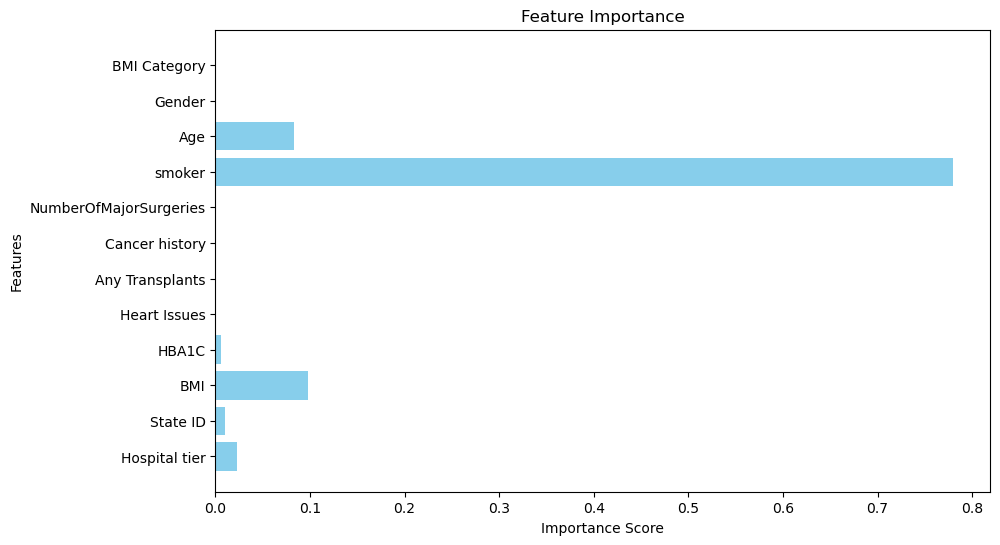

In [65]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
##plt.gca().invert_yaxis()
plt.show()


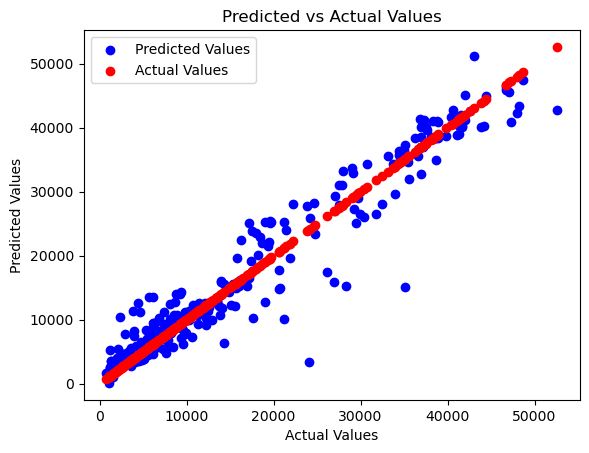

In [93]:
import matplotlib.pyplot as plt

# Predictions vs Actuals
plt.scatter(y_test,y_pred_Gb, color='blue', label='Predicted Values')

# Plot actual values
plt.scatter( y_test,y_test, color='red', label='Actual Values')

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

# Adding legend
plt.legend()

# Show plot
plt.show()


In [ ]:
#Case scenario:
# Estimate the hospitalization cost for Christopher and Ms. Jayna. Ms. Jayna, born on 12/28/1988, 
#stands at 170 cm and weighs 85 kg. She resides with her partner and two children in a tier-1 city, 
#holding State ID R1011. Ms. Jayna, a non-diabetic with an HbA1c level of 5.8, is an otherwise healthy 
#individual, though a smoker. She has not undergone any transplants or major surgeries. Notably, 
#her father succumbed to lung cancer. The calculation of hospitalization expenses will be based on 
#tier-1 hospitals.
# 4. Find the predicted hospitalization cost using the best models


In [71]:
df_p = pd.read_csv('prediction.csv', header =0, sep= ',')

In [72]:
df_p

,Hospital tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender,BMI Category
0,1,1,25,5.8,0,0,1,0,1,36,2,0


In [73]:
p = df_p

In [75]:
predict_p = gb_model.predict(p)

predict_p

array([28345.73504191])

In [82]:
# the prediction is comparable to the other patients with similar health conditions. Another 36 yer old patient,
#a smoker and family history of cancer has incurred hospitalization costs of around $28,500. The prediction is close to that.
#ofcourse this is a prediction and actuals could be different. 


X_36 = Df_x[Df_x['Age']==36]

X_36

,Hospital tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender,BMI Category
218,2,3,15.680,6.16,1,0,0,1,0,36,1,0
252,2,3,16.720,4.38,1,0,0,1,0,36,1,0
275,2,2,15.570,4.07,1,0,0,1,0,36,1,0
316,2,3,19.120,4.72,1,0,0,1,0,36,1,0
321,2,2,16.810,5.51,1,0,0,1,0,36,2,0
328,2,3,18.920,5.98,1,0,0,1,0,36,2,0
336,2,3,19.590,6.04,1,0,0,1,0,36,1,0
347,2,3,19.480,5.63,1,0,0,1,0,36,2,0
360,3,3,34.210,4.48,1,0,0,1,0,36,1,1
372,2,3,20.230,6.16,1,0,0,1,0,36,2,0
